In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords
from sklearn.metrics import log_loss


stopwords = stopwords.words('english')
sns.set_context('notebook')

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
train = pd.read_csv('train.csv', skiprows=1, names=['ID', 'Text', 'Author']).set_index('ID')
test = pd.read_csv('test.csv', skiprows=1, names=['ID', 'Text']).set_index('ID')

# Delete the word 'id' from the ID columns
train.index = [id[2:] for id in train.index]
test.index = [id[2:] for id in test.index]

In [4]:
display(train.head())

,Text,Author
26305,"This process, however, afforded me no means of...",EAP
17569,It never once occurred to me that the fumbling...,HPL
11008,"In his left hand was a gold snuff box, from wh...",EAP
27763,How lovely is spring As we looked from Windsor...,MWS
12958,"Finding nothing else, not even gold, the Super...",HPL


In [5]:
display(test.head())

,Text
02310,"Still, as I urged our leaving Ireland with suc..."
24541,"If a fire wanted fanning, it could readily be ..."
00134,And when they had broken down the frail door t...
27757,While I was thinking how I should possibly man...
04081,I am not sure to what limit his knowledge may ...


In [6]:
print('Training sample:', train['Text'][0])
print('Author of sample:', train['Author'][0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Training sample: This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
Author of sample: EAP
Training Data Shape: (19579, 2)
Testing Data Shape: (8392, 1)


In [7]:
print('Training Dataset Info:')
display(train.info())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 19579 entries, 26305 to 00393
Data columns (total 2 columns):
Text      19579 non-null object
Author    19579 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


None

In [8]:
print('Testing Dataset Info:')
display(test.info())

Testing Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 8392 entries, 02310 to 04282
Data columns (total 1 columns):
Text    8392 non-null object
dtypes: object(1)
memory usage: 131.1+ KB


None

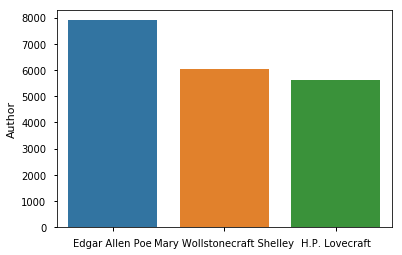

In [9]:
# Barplot of occurances of each author in the training dataset
sns.barplot(x=['Edgar Allen Poe', 'Mary Wollstonecraft Shelley', 'H.P. Lovecraft'], y=train['Author'].value_counts())
plt.show()

In [10]:
font = open('DoubleFeature21.ttf', 'rb') # open binary file in read mode
font_read = font.read()
font_64_encode = base64.encodebytes(font_read)
print(font_64_encode) 

b'AAEAAAAUAQAABABAR0RFRgDRAMQAAfSkAAAAJEdQT1PEwvOGAAH0yAAAPWpMVFNI5DX1swAABaQA\nAADjT1MvMnXcNiMAAAHIAAAAYFZETVhobW+mAAAGiAAABeBjbWFwTkneDAAAIOwAAAT+Y3Z0IAAU\nAAAAACdkAAAAAmZwZ20GWZw3AAAl7AAAAXNnYXNwABcACQAB9JQAAAAQZ2x5ZhdQxEQAACdoAAFN\nGGhkbXgaf55dAAAMaAAAFIRoZWFk9bw+hAAAAUwAAAA2aGhlYQZ9A0oAAAGEAAAAJGhtdHjfuAFp\nAAACKAAAA3xrZXJuC2kdJgABdkAAAEXGbG9jYexgQjoAAXSAAAABwG1heHAC+AV6AAABqAAAACBu\nYW1l0zLcAAABvAgAADZ9cG9zdFuJPwcAAfKIAAACDHByZXC4AAArAAAnYAAAAAQAAQAAAAIZmWaJ\n/OpfDzz1ABkD6AAAAADJe2HgAAAAAMmGf8//nP21A/AEoQAAAAkAAgAAAAAAAAABAAAC7v8GAAAD\n9f+c/28D8AABAAAAAAAAAAAAAAAAAAAA3wABAAAA3wI1AAcBqgAEAAEAAAAAAAoAAAIAAZkAAwAB\nAAMCSAGQAAUAAAK8AooAAACMArwCigAAAd0AMgD6CA8DAAAAAAAAAAAAgAAALxAAQEoAAAAAAAAA\nACAgICAAQAAg8CAC7v8GAAAEoQJLAAAAAYAAAAAB9AK8AAAAIAACAV4AAAJJAAUCcwAEAnP//wFe\nAAAA8AAFARoAAwKxAAUCMQAEAlwABQCRAAUBGwADAS4AAQFuAAQBywADANkABQF3AAMA2gAFAbwA\nBAKGAAUBTQADAlkABQIpAAYCbAAEAh4ABQIxAAUCOgAFAg4AAwIwAAYA3AAEANn//QF9AAYBzQAG\nAYAAAwIFAAQC4AAFAuz/8wJNAAUCkQAFAkMABAJAAAYCGgAFArYABAJxAAIBSw

In [11]:
font_64_decode = base64.decodebytes(font_64_encode) 
font_result = open('spooky_font.ttf', 'wb') # create a writable font file and write the decoding result
font_result.write(font_64_decode)
font_result.close()

In [12]:
# Combine all training text into one large string
all_text = ' '.join([text for text in train['Text']])
print('Number of words in all_text:', len(all_text))

Number of words in all_text: 2937973


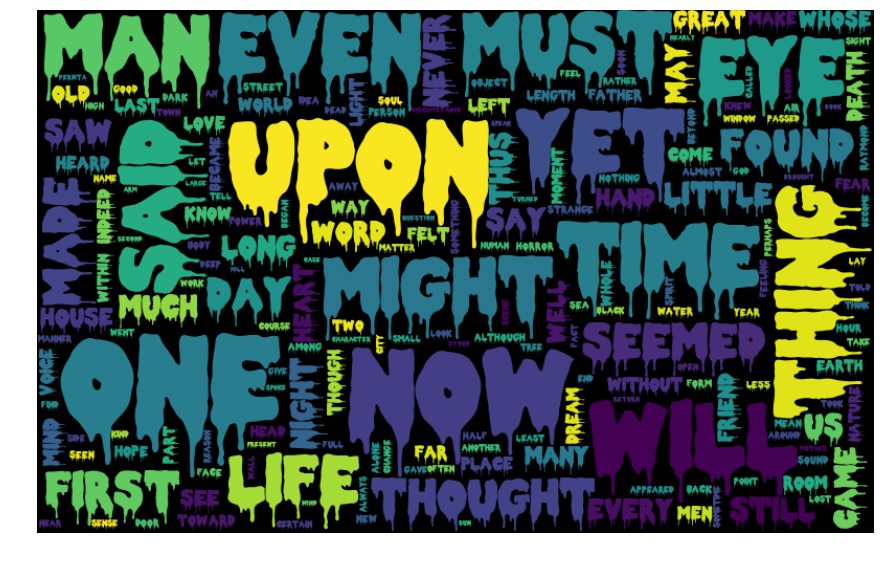

In [13]:
wordcloud = WordCloud(font_path='spooky_font.ttf', width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
# Grab all text that is written by Edgar Allen Poe
eap = train[train['Author'] == 'EAP']
eap_text = ' '.join(text for text in eap['Text'])
print('Number of words in eap_text:', len(eap_text))

Number of words in eap_text: 1131484


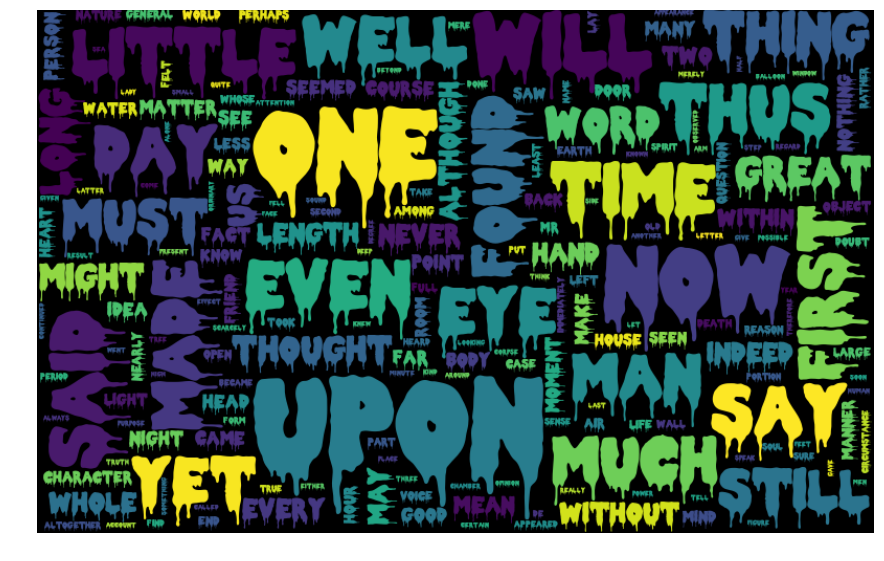

In [15]:
# Word cloud for entire training dataset
# default width=400, height=200
wordcloud = WordCloud(font_path='spooky_font.ttf', width=800, height=500,
                      random_state=21, max_font_size=110).generate(eap_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
# Grab all text that is written by Mary Wollstonecraft Shelley
mws = train[train['Author'] == 'MWS']
mws_text = ' '.join(text for text in mws['Text'])
print('Number of words in eap_text:', len(mws_text))

Number of words in eap_text: 922675


In [17]:
# Grab all text that is written by H.P. Lovecraft
hpl = train[train['Author'] == 'HPL']
hpl_text = ' '.join(text for text in hpl['Text'])
print('Number of words in eap_text:', len(hpl_text))

Number of words in eap_text: 883812


In [18]:
!pip install spacy

In [19]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [20]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [21]:
# First combine train and test text into one dataframe to make parsing text easier
all_text = np.concatenate((train['Text'], test['Text']), axis=0)
all_text = pd.DataFrame(all_text, columns=['Text'])
print('Number of total text documents:', len(all_text))

Number of total text documents: 27971


In [22]:
# Define function to preprocess text for a word2vec model
def cleanup_text_word2vec(docs, logging=False):
    sentences = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents" % (counter, len(docs)))
        # Disable tagger so that lemma_ of personal pronouns (I, me, etc) don't getted marked as "-PRON-"
        doc = nlp(doc, disable=['tagger'])
        # Grab lemmatized form of words and make lowercase
        doc = " ".join([tok.lemma_.lower() for tok in doc])
        # Split into sentences based on punctuation
        doc = re.split("[\.?!;] ", doc)
        # Remove commas, periods, and other punctuation (mostly commas)
        doc = [re.sub("[\.,;:!?]", "", sent) for sent in doc]
        # Split into words
        doc = [sent.split() for sent in doc]
        sentences += doc
        counter += 1
    return sentences

In [23]:
train_cleaned_word2vec = cleanup_text_word2vec(all_text['Text'], logging=True)
print('Cleaned up training data size (i.e. number of sentences): ', len(train_cleaned_word2vec))

Processed 1000 out of 27971 documents
Processed 2000 out of 27971 documents
Processed 3000 out of 27971 documents
Processed 4000 out of 27971 documents
Processed 5000 out of 27971 documents
Processed 6000 out of 27971 documents
Processed 7000 out of 27971 documents
Processed 8000 out of 27971 documents
Processed 9000 out of 27971 documents
Processed 10000 out of 27971 documents
Processed 11000 out of 27971 documents
Processed 12000 out of 27971 documents
Processed 13000 out of 27971 documents
Processed 14000 out of 27971 documents
Processed 15000 out of 27971 documents
Processed 16000 out of 27971 documents
Processed 17000 out of 27971 documents
Processed 18000 out of 27971 documents
Processed 19000 out of 27971 documents
Processed 20000 out of 27971 documents
Processed 21000 out of 27971 documents
Processed 22000 out of 27971 documents
Processed 23000 out of 27971 documents
Processed 24000 out of 27971 documents
Processed 25000 out of 27971 documents
Processed 26000 out of 27971 docum

In [24]:
from gensim.models.word2vec import Word2Vec

text_dim = 300
print("Training Word2Vec model...")
wordvec_model = Word2Vec(train_cleaned_word2vec, size=text_dim, window=5, min_count=3, workers=4, sg=1)
print("Word2Vec model created.")
print("%d unique words represented by %d dimensional vectors" % (len(wordvec_model.wv.vocab), text_dim))

Training Word2Vec model...
Word2Vec model created.
10770 unique words represented by 300 dimensional vectors


In [25]:
!pip install gensim

In [26]:
print(wordvec_model.wv.most_similar(positive=['woman', 'king'], negative=['man']))
print(wordvec_model.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man']))
print(wordvec_model.wv.doesnt_match("breakfast cereal dinner lunch".split()))
print(wordvec_model.wv.similarity('woman', 'man'))
print(wordvec_model.wv.similarity('gruesome', 'terrify'))

[('daughter', 0.8280592560768127), ('son', 0.818448007106781), ('favourite', 0.8108730316162109), ('mother', 0.8057695627212524), ('eldest', 0.7959691882133484), ('young', 0.7922381162643433), ('girl', 0.7882493734359741), ('widow', 0.7836034893989563), ('birth', 0.7829939126968384), ('husband', 0.776258111000061)]
[('daughter', 1.0975863933563232), ('son', 1.0821201801300049), ('favourite', 1.0795683860778809), ('mother', 1.0745127201080322), ('eldest', 1.060598611831665), ('birth', 1.0604618787765503), ('young', 1.058609127998352), ('husband', 1.05657160282135), ('widow', 1.0549567937850952), ('girl', 1.0548330545425415)]


C:\Users\dhari\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:858: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


dinner
0.7100057
0.8394515


In [42]:
# Define function to create word vectors given a cleaned piece of text.
def create_average_vec(doc):
    average = np.zeros((text_dim,), dtype='float32')
    num_words = 0.
    for word in doc.split():
        if word in wordvec_model.wv.vocab:
            average = np.add(average, wordvec_model[word])
            num_words += 1.
    if num_words != 0.:
        average = np.divide(average, num_words)
    return average

In [49]:
# Counting the number of empty strings are in train_cleaned
count = 0
for i in range(len(train_cleaned)):
    if train_cleaned[i] == "":
        print("index:", i)
        count += 1
print(count)

index: 477
index: 1023
index: 3601
index: 8654
4


In [48]:
# Create word vectors
train_cleaned_vec = np.zeros((train.shape[0], text_dim), dtype="float32")  # 19579 x 300
for i in range(len(train_cleaned)):
    train_cleaned_vec[i] = create_average_vec(train_cleaned[i])

print("Train word vector shape:", train_cleaned_vec.shape)

C:\Users\dhari\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Train word vector shape: (19579, 300)


In [47]:
# Cleanup text and make sure it retains original shape
print('Original training data shape: ', train['Text'].shape)
train_cleaned = cleanup_text(train['Text'], logging=True)
print('Cleaned up training data shape: ', train_cleaned.shape)

Original training data shape:  (19579,)
Processed 1000 out of 19579 documents.
Processed 2000 out of 19579 documents.
Processed 3000 out of 19579 documents.
Processed 4000 out of 19579 documents.
Processed 5000 out of 19579 documents.
Processed 6000 out of 19579 documents.
Processed 7000 out of 19579 documents.
Processed 8000 out of 19579 documents.
Processed 9000 out of 19579 documents.
Processed 10000 out of 19579 documents.
Processed 11000 out of 19579 documents.
Processed 12000 out of 19579 documents.
Processed 13000 out of 19579 documents.
Processed 14000 out of 19579 documents.
Processed 15000 out of 19579 documents.
Processed 16000 out of 19579 documents.
Processed 17000 out of 19579 documents.
Processed 18000 out of 19579 documents.
Processed 19000 out of 19579 documents.
Cleaned up training data shape:  (19579,)


In [46]:
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [44]:
punctuations = string.punctuation

In [33]:
from sklearn.preprocessing import label_binarize

# Transform labels into one hot encoded format.
y_train_ohe = label_binarize(train['Author'], classes=['EAP', 'HPL', 'MWS'])
print('y_train_ohe shape: {}'.format(y_train_ohe.shape))
print('y_train_ohe samples:')
print(y_train_ohe[:5])

y_train_ohe shape: (19579, 3)
y_train_ohe samples:
[[1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


In [123]:
from sklearn.model_selection import train_test_split

# If using spaCy word vectors
# X_train, X_test, y_train, y_test = train_test_split(train_vec, y_train_ohe, test_size=0.2, random_state=21)
# If using Word2Vec word vectors
X_train, X_test, y_train, y_test = train_test_split(train_cleaned_vec, y_train_ohe, test_size=0.2, random_state=21)

print('X_train size: {}'.format(X_train.shape))
print('X_test size: {}'.format(X_test.shape))
print('y_train size: {}'.format(y_train.shape))
print('y_test size: {}'.format(y_test.shape))

X_train size: (15663, 300)
X_test size: (3916, 300)
y_train size: (15663, 3)
y_test size: (3916, 3)


# Part A- Deep Learning with Keras

In [35]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, LSTM, Embedding, Bidirectional, Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.optimizers import SGD

C:\Users\dhari\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
!pip install numpy

In [ ]:
!pip install --upgrade numpy

In [ ]:
!pip install numpy==1.16.0

# Part B- Activation Function  & Part F - Network Architecture 

In [124]:
def build_model(architecture='cnn'):
    model = Sequential()
    if  architecture == 'cnn':
        # 1-D Convolutional Neural Network
        inputs = Input(shape=(300,1))

        x = Conv1D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(inputs)

        #Cuts the size of the output in half, maxing over every 2 inputs
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(x)
        x = GlobalMaxPooling1D()(x) 
        outputs = Dense(3, activation='softmax')(x)

        model = Model(inputs=inputs, outputs=outputs, name='CNN')
   
        print('Error: Model type not found.')
    return model

# Part G - Network initialization 

In [118]:
def build_model(architecture='cnn'):
    model = Sequential()
    if  architecture == 'cnn':
        # 1-D Convolutional Neural Network
        inputs = Input(shape=(300,1))

        x = Conv1D(64, 4, strides=1, padding='same', activation='sigmoid', kernel_initializer='zero')(inputs)

        #Cuts the size of the output in half, maxing over every 2 inputs
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(128, 4, strides=1, padding='same', activation='sigmoid', kernel_initializer='zero')(x)
        x = GlobalMaxPooling1D()(x) 
        outputs = Dense(4, activation='softmax')(x)

        model = Model(inputs=inputs, outputs=outputs, name='CNN')
   
        print('Error: Model type not found.')
    return model

In [125]:
# Define keras model
# Using MLP in kernel for speed
#model = build_model('mlp')
model = build_model('cnn')
#model = build_model('lstm')

# If the model is a CNN then expand the dimensions of the training data
if model.name == "CNN":
    X_train = np.expand_dims(X_train, axis=2)
    X_test = np.expand_dims(X_test, axis=2)
    print('Text train shape: ', X_train.shape)
    print('Text test shape: ', X_test.shape)
    
model.summary()

Error: Model type not found.
Text train shape:  (15663, 300, 1)
Text test shape:  (3916, 300, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 300, 1)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 300, 64)           256       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 150, 64)           0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 150, 128)          24704     
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 387       
Total params: 25,347
Trainable params: 25,347

# PART C(Cost Function) AND E(Gradient Estimation)

In [126]:
# Compile the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['acc','categorical_accuracy'])

In [ ]:
# Compile the model
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc','categorical_accuracy'])

In [127]:
print('Text train shape: ', X_train.shape)
print('Text test shape: ', X_test.shape)

Text train shape:  (15663, 300, 1)
Text test shape:  (3916, 300, 1)


# PART D Epochs

In [ ]:
#epochs = 20

# Fit the model to the training data
#estimator = model.fit(X_train, y_train,
                     # validation_split=0.2,
                      #epochs=epochs, batch_size=128, verbose=2, shuffle=True)

In [128]:
epochs = 50

# Fit the model to the training data
estimator = model.fit(X_train, y_train,
                      validation_split=0.2,
                      epochs=epochs, batch_size=128, verbose=2, shuffle=True)

Train on 12530 samples, validate on 3133 samples
Epoch 1/50
 - 10s - loss: 0.1861 - acc: 0.5820 - categorical_accuracy: 0.5820 - val_loss: 0.1655 - val_acc: 0.6396 - val_categorical_accuracy: 0.6396
Epoch 2/50
 - 10s - loss: 0.1526 - acc: 0.6782 - categorical_accuracy: 0.6782 - val_loss: 0.1471 - val_acc: 0.6802 - val_categorical_accuracy: 0.6802
Epoch 3/50
 - 9s - loss: 0.1402 - acc: 0.7008 - categorical_accuracy: 0.7008 - val_loss: 0.1431 - val_acc: 0.6811 - val_categorical_accuracy: 0.6811
Epoch 4/50
 - 10s - loss: 0.1355 - acc: 0.7058 - categorical_accuracy: 0.7058 - val_loss: 0.1369 - val_acc: 0.7041 - val_categorical_accuracy: 0.7041
Epoch 5/50
 - 10s - loss: 0.1311 - acc: 0.7201 - categorical_accuracy: 0.7201 - val_loss: 0.1329 - val_acc: 0.7191 - val_categorical_accuracy: 0.7191
Epoch 6/50
 - 10s - loss: 0.1296 - acc: 0.7184 - categorical_accuracy: 0.7184 - val_loss: 0.1357 - val_acc: 0.7060 - val_categorical_accuracy: 0.7060
Epoch 7/50
 - 10s - loss: 0.1284 - acc: 0.7221 - cat

In [129]:
print("Training accuracy: %.2f%% / Validation accuracy: %.2f%%" % 
      (100*estimator.history['acc'][-1], 100*estimator.history['val_acc'][-1]))

Training accuracy: 76.30% / Validation accuracy: 71.53%


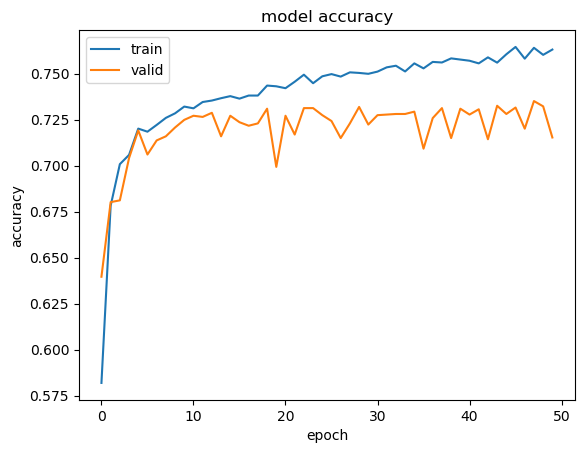

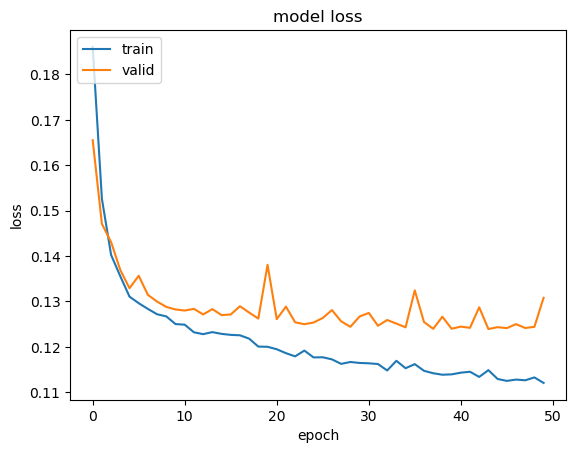

In [130]:
# Plot model accuracy over epochs
sns.reset_orig()   # Reset seaborn settings to get rid of black background
plt.plot(estimator.history['acc'])
plt.plot(estimator.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Plot model loss over epochs
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()